<a href="https://colab.research.google.com/github/AshutoshDhungana/hate_speech_NLP/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
path = '/content/drive/MyDrive/Dataset_colab/twitter_hate_speech.csv'
df = pd.read_csv(path)

In the given CSV the polarity has alrady been classfied in the dataset,
the polarity indicates the type of tweet it is Neutral, Positive or Negative

In this data set it is classified as follows:<br>
<br>
0 = negative, <br>
2 = neutral,  <br>
4 = positive

In [27]:
df.head()


,polarity,"""tweet_id""","""date""","""Query""","""username""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [16]:
df.tail()

,polarity,"""tweet_id""","""date""","""Query""","""username""","""text_of_tweet"""
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   polarity          1600000 non-null  int64 
 1    "tweet_id"       1600000 non-null  int64 
 2    "date"           1600000 non-null  object
 3    "Query"          1600000 non-null  object
 4    "username"       1600000 non-null  object
 5    "text_of_tweet"  1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [18]:
df.columns

Index(['polarity', ' "tweet_id"', ' "date"', ' "Query"', ' "username"',
       ' "text_of_tweet"'],
      dtype='object')

In [19]:
df[' "Query"'].value_counts("NO_QUERY")

,proportion
"""Query""",
NO_QUERY,1.0


The 'Query' column of the dataset seems to contains only the value "NO_QUERY", so we can delete that column.

In [28]:
df.drop(columns = [' "Query"'], inplace = True)

In [29]:
df.head()

,polarity,"""tweet_id""","""date""","""username""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


The username of the user is also something we dont require so we can eliminate that column too

In [31]:
df.drop(columns = [' "username"'], inplace = True)

In [32]:
df.head()

,polarity,"""tweet_id""","""date""","""text_of_tweet"""
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all...."


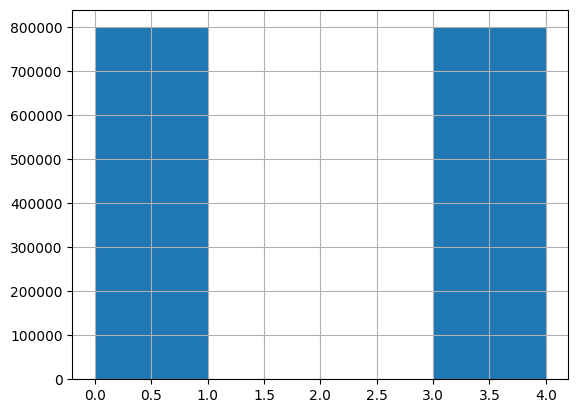

In [26]:
df['polarity'].hist(bins = 4)
plt.show()

From the above histogram we can see that there are tweets of either Negative or Positive tweets, without any Neutral tweets